Import numpy, matplotlib, and keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import keras.layers as layers

# **DATA INSPECTION**

Download the MNIST dataset with keras in the official documentation (https://keras.io/)

x_train and x_test contain 28x28 INPUT FEATURES for all examples (60000 and 10000 respectively)

y_train and y_test  contain 1 OUTPUT FEATURES for all examples

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Check the shape of the training and test set.

In [ ]:
# shape
print (x_train.shape)
print (y_train.shape)

print (x_test.shape)
print (y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Get shape of the first example

In [ ]:
x_train[0].shape

(28, 28)

Display 10 central rows and 10 central columns of the first example

In [ ]:
x_train[0, 9:19, 9:19]

array([[156, 107, 253, 253, 205,  11,   0,  43, 154,   0],
       [ 14,   1, 154, 253,  90,   0,   0,   0,   0,   0],
       [  0,   0, 139, 253, 190,   2,   0,   0,   0,   0],
       [  0,   0,  11, 190, 253,  70,   0,   0,   0,   0],
       [  0,   0,   0,  35, 241, 225, 160, 108,   1,   0],
       [  0,   0,   0,   0,  81, 240, 253, 253, 119,  25],
       [  0,   0,   0,   0,   0,  45, 186, 253, 253, 150],
       [  0,   0,   0,   0,   0,   0,  16,  93, 252, 253],
       [  0,   0,   0,   0,   0,   0,   0,   0, 249, 253],
       [  0,   0,   0,   0,   0,  46, 130, 183, 253, 253]], dtype=uint8)

Print first example full array

In [ ]:
for line in range(28):
  print (list(x_train[0, line]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 30, 36, 94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 80, 156, 107, 253, 253, 205, 11, 0, 43, 154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 1, 154, 25

Provide to the matplotlib imshow command below the first train input example to visualize nicely the input features.

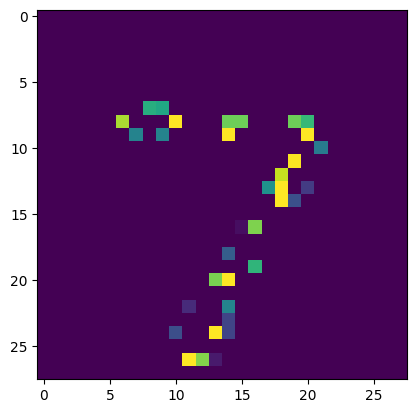

In [ ]:
plt.imshow(corr[0])

The code displays how many examples are available for class 9 in the training set. Modify it to do the same for all classes.

In [ ]:
for i in range(10):
  acc = 0

  for n in y_train:
    if n == i: acc = acc +1

  print (acc)




5923
6742
5958
6131
5842
5421
5918
6265
5851
5949


The following code uses matplotlib to create a barplot showing how many examples are available for each class in training and test set.

Group the class counts for train set obtained in the previous cell into a single array called

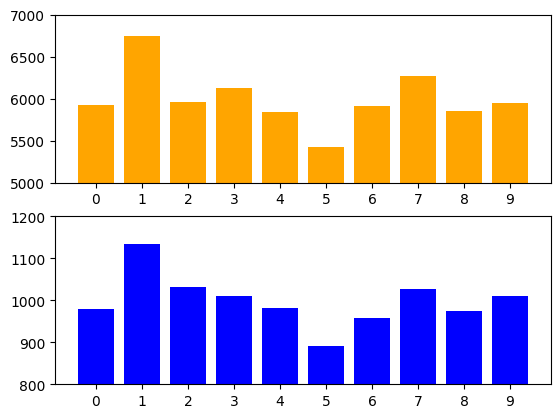

In [ ]:
train_class_numbers = np.array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]) # substitute ... with a list of your train set class counts
test_class_numbers = np.array([980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]) # same as above, with test set class counts
positions = np.arange(10)

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.bar(positions, train_class_numbers, color='orange')
ax2.bar(positions, test_class_numbers, color='blue')

ax1.set_ylim(5000,7000)
ax2.set_ylim(800,1200)
ax1.set_xticks(positions)
ax2.set_xticks(positions)

plt.show()

# **DATA PREPROCESSING**

This function normalizes input array values, scaling them between 0 and 1 (dividing every value in the array by the maximum value)

Call it first, to normalize both input features arrays.


Then compare line 10 columns 10 to 15 of the first example to the same fragment in the normalized array.

In [ ]:
def normalize_input(arr):
  return arr/np.max(arr)

x_train_norm = normalize_input(x_train)
x_test_norm = normalize_input(x_test)
print (x_train[0,10,10:16])
print (x_train_norm[0,10,10:16])



[  1 154 253  90   0   0]
[0.00392157 0.60392157 0.99215686 0.35294118 0.         0.        ]


The to_categorical function transforms labels in one-hot encodings.

Compare a short fragment of the original y_test array (the first ten labels) to the same positions of the newly generated one.

Use this function on the test set as well.

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=10)
print (y_train[:10])
print (y_train_cat[:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# **NOISE INJECTION**

The function below moves empty rows/columns of pixels from random borders to the opposite ones, for a specified number of times, actually moving the handwritten digit in a random direction inside the picture.

Use it on the train and test input features, and verify what happens visualizing few examples with the imshow matplotlib command.

Create many different copies of the input features by allowing different numbers of moves (5, 10, 15), normalize them and try to use them to train a neural network.

In [ ]:
def loc_noise(arr, moves):
  new_arr = np.zeros(arr.shape)

  for n in range(len(arr)):
    shifted = np.array(arr[n])
    left_moves = moves

    directions = np.array((1,2,3,4))
    np.random.shuffle(directions)
    directions = directions[1:]

    while left_moves!=0:
      direction = np.random.choice(directions)
      if direction == 1: shifted = np.roll(shifted, -1, axis=0)
      if direction == 2: shifted = np.roll(shifted, 1, axis=0)
      if direction == 3: shifted = np.roll(shifted, -1, axis=1)
      if direction == 4: shifted = np.roll(shifted, 1, axis=1)

      if np.any(shifted[0,:]!=0) or np.any(shifted[-1,:]!=0) \
      or np.any(shifted[:,0]!=0) or np.any(shifted[:,-1]!=0):
        break

      left_moves -= 1

    new_arr[n] = shifted

  return new_arr

The function below turns to 0 random pixels which are part of the digit depiction.

Use it on the train and test input features, and verify what happens visualizing few examples with the imshow matplotlib command.

Create many different copies of the input features by allowing different perc values (start with 1, 5, 10), normalize them and try to use them to train a neural network.

In [ ]:
def scatter_noise_neg(arr, perc):
  new_arr = np.zeros(arr.shape)

  for n in range(len(arr)):
    corrupted = np.array(arr[n])

    tot = np.sum(np.where(corrupted!=0, 1, 0))
    to_change = int((float(tot)/100)*perc)

    while to_change > 0:
      indexes = np.argwhere(corrupted!=0)
      choice = np.random.choice(np.arange(len(indexes)))
      pixel = indexes[choice]
      corrupted[pixel[0],pixel[1]] = 0
      to_change -= 1

    new_arr[n] = corrupted

  return new_arr

corr = scatter_noise_neg(x_test, 100)

The function below turns to 255 random pixels which are not part of the digit depiction.

Use it on the train and test input features, and verify what happens visualizing few examples with the imshow matplotlib command.

Create many different copies of the input features by allowing different perc values (start with 1, 5, 10), normalize them and try to use them to train a neural network.

In [ ]:
def scatter_noise_pos(arr, perc):
  new_arr = np.zeros(arr.shape)

  for n in range(len(arr)):
    corrupted = np.array(arr[n])

    tot = np.sum(np.where(corrupted==0, 1, 0))
    to_change = int((float(tot)/100)*perc)

    while to_change > 0:
      indexes = np.argwhere(corrupted==0)
      choice = np.random.choice(np.arange(len(indexes)))
      pixel = indexes[choice]
      corrupted[pixel[0],pixel[1]] = 255
      to_change -= 1

    new_arr[n] = corrupted

  return new_arr

The function below modifies random pixels by increasing them if they are equal to 0 or setting them low if they are different from 0.

Use it on the train and test input features, and verify what happens visualizing few examples with the imshow matplotlib command.

Create many different copies of the input features by allowing different perc values (start with 1, 5, 10), normalize them and try to use them to train a neural network.

In [ ]:
def scatter_noise_all(arr, perc):
  new_arr = np.zeros(arr.shape)

  for n in range(len(arr)):
    corrupted = np.array(arr[n])

    tot = 28*28
    to_change = int((float(tot)/100)*perc)

    while to_change > 0:
      indexes = np.transpose(np.reshape(np.indices((28, 28)), (2, 28*28)))
      choice = np.random.choice(np.arange(len(indexes)))
      pixel = indexes[choice]
      if corrupted[pixel[0],pixel[1]] != 0:
        corrupted[pixel[0],pixel[1]] = np.random.choice(np.arange(0,55))
      else:
        corrupted[pixel[0],pixel[1]] = np.random.choice(np.arange(200,255))
      to_change -= 1

    new_arr[n] = corrupted

  return new_arr

corr = scatter_noise_all(x_train, 1)

The function below turns to 0 random stripes (horizontal or vertical) which are part of the digit depiction.

Use it on the train and test input features, and verify what happens visualizing few examples with the imshow matplotlib command.

Create many different copies of the input features by allowing different lines value (start with 1, 2 and 3), normalize them and try to use them to train a neural network.

In [ ]:
def stripe_noise_neg(arr, lines):
  new_arr = np.zeros(arr.shape)

  for n in range(len(arr)):
    corrupted = np.array(arr[n])
    left_lines = lines

    directions = np.array((0,1))
    direction = np.random.choice(directions)

    while left_lines!=0:
      indexes = np.where(np.any(corrupted!=0, axis=direction))[0]
      choice = np.random.choice(indexes)

      if direction == 0:
         corrupted[choice,:] = 0

      if direction == 1:
         corrupted[:,choice] = 0

      left_lines -= 1

    new_arr[n] = corrupted

  return new_arr

stripes = stripe_noise_neg(x_train, 3)

The function below turns to 255 random stripes (horizontal or vertical).

Use it on the train and test input features, and verify what happens visualizing few examples with the imshow matplotlib command.

Create many different copies of the input features by allowing different lines value (start with 1, 2 and 3), normalize them and try to use them to train a neural network.

In [ ]:
def stripe_noise_pos(arr, lines):
  new_arr = np.zeros(arr.shape)

  for n in range(len(arr)):
    corrupted = np.array(arr[n])
    left_lines = lines

    directions = np.array((0,1))
    direction = np.random.choice(directions)

    while left_lines!=0:
      choice = np.random.choice(np.arange(28))

      if direction == 0:
         corrupted[choice,:] = 255

      if direction == 1:
         corrupted[:,choice] = 255

      left_lines -= 1

    new_arr[n] = corrupted

  return new_arr

stripes = stripe_noise_pos(x_train, 3)

In [ ]:
def scatter_noise_neg(arr, perc):
  new_arr = np.zeros(arr.shape)

  for n in range(len(arr)):
    corrupted = np.array(arr[n])

    tot = np.sum(np.where(corrupted!=0, 1, 0))
    to_change = int((float(tot)/100)*perc)

    while to_change > 0:
      indexes = np.argwhere(corrupted!=0)
      choice = np.random.choice(np.arange(len(indexes)))
      pixel = indexes[choice]
      corrupted[pixel[0],pixel[1]] = 0
      to_change -= 1

    new_arr[n] = corrupted

  return new_arr

x_train_c = scatter_noise_neg(x_train, 100)

def normalize_input(arr):
  return arr/np.max(arr)

x_train_c = normalize_input(x_train_c)

x_train_a=np.concatenate((x_train_norm, x_train_c), axis=0)
y_train_a=np.concatenate((y_train_cat, y_train_cat), axis=0)



# **MODEL FITTING**

Set up a simple neural network (up to 5 dense layers, each layer containing less than 100 units) using the keras Sequential module.

Set your hidden layers activation functions as hyperbolic and your output layer activation function as softmax.

Set the proper values for input shape and number of classes.

Double check its structure by using the summary() method of the resulting model object.

In [ ]:
model = keras.Sequential([
          keras.Input(shape=(28, 28)),
          layers.Flatten(),
          layers.Dense(32, activation="tanh"),
          layers.Dense(32, activation="tanh"),
          layers.Dense(32, activation="tanh"),
          layers.Dense(32, activation="tanh"),

          layers.Dense(10, activation="softmax")])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_60 (Dense)            (None, 32)                25120     
                                                                 
 dense_61 (Dense)            (None, 32)                1056      
                                                                 
 dense_62 (Dense)            (None, 32)                1056      
                                                                 
 dense_63 (Dense)            (None, 32)                1056      
                                                                 
 dense_64 (Dense)            (None, 10)                330       
                                                                 
Total params: 28618 (111.79 KB)
Trainable params: 286

Compile the produced model to use:

*   categorical crossentropy loss(error) function
*   adam optimizer
*   accuracy metric

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics="accuracy")

In [ ]:
print(y_train_a.shape)

(120000, 10)


Fit the model on the training data (specify the proper array name) for few tens of epochs and using a validation split of 0.1. Try to play with model parameters to raise accuracy as much as possible.

In [ ]:
h = model.fit(x_train_norm, y_train_cat, batch_size=784, epochs=10, validation_split=0.1)
# h is an object containing data about the training procedure, like the behaviour of the loss in every epoch.
# This data is stored in h.history which is a dictionary.
# Take a look at it by printing h.history or list(h.history.keys()).
# The first command will show the whole dictionary (lots of numbers), the second only all the dictionary keys

Epoch 1/10
69/69 [==============================] - 1s 9ms/step - loss: 0.0684 - accuracy: 0.9805 - val_loss: 0.0973 - val_accuracy: 0.9697
Epoch 2/10
69/69 [==============================] - 1s 8ms/step - loss: 0.0640 - accuracy: 0.9816 - val_loss: 0.1013 - val_accuracy: 0.9677
Epoch 3/10
69/69 [==============================] - 1s 13ms/step - loss: 0.0616 - accuracy: 0.9821 - val_loss: 0.0985 - val_accuracy: 0.9695
Epoch 4/10
69/69 [==============================] - 1s 14ms/step - loss: 0.0572 - accuracy: 0.9837 - val_loss: 0.0983 - val_accuracy: 0.9698
Epoch 5/10
69/69 [==============================] - 1s 14ms/step - loss: 0.0528 - accuracy: 0.9849 - val_loss: 0.0950 - val_accuracy: 0.9703
Epoch 6/10
69/69 [==============================] - 1s 15ms/step - loss: 0.0518 - accuracy: 0.9850 - val_loss: 0.0972 - val_accuracy: 0.9703
Epoch 7/10
69/69 [==============================] - 1s 11ms/step - loss: 0.0487 - accuracy: 0.9858 - val_loss: 0.1040 - val_accuracy: 0.9672
Epoch 8/10
69/6

Use matplotlib to create a line plot, describing the behavior of the loss/error function during training for train and validation splits. Fill in the right keys from the h.history dictionary

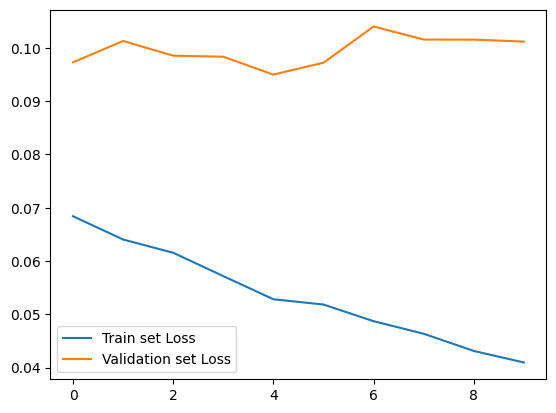

In [ ]:

plt.plot(h.history['loss'], label="Train set Loss")
plt.plot(h.history['val_loss'], label="Validation set Loss")
plt.legend()

plt.show()

Same as before, but this time plot instead the behavior of accuracy during training for train and validation splits. Fill in the right keys from the h.history dictionary

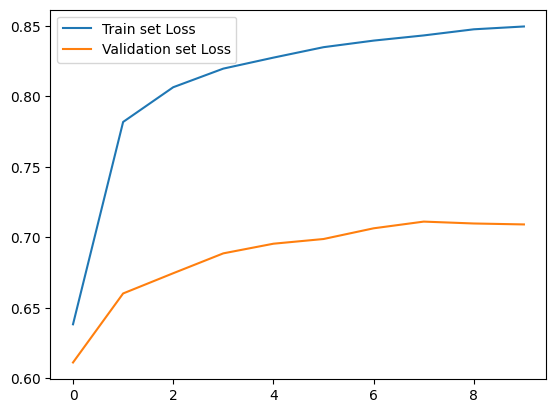

In [ ]:
plt.plot(h.history['accuracy'], label="Train set Loss")
plt.plot(h.history['val_accuracy'], label="Validation set Loss")
plt.legend()

plt.show()

Use the fitted model to get predictions for the appropriate test data

In [ ]:
predictions = model.predict(corr)

313/313 [==============================] - 1s 2ms/step


Cell below compares test predictions to the correct test labels. Labels are categorical while predictions assign to each example a probability to belong to each class (according to the network). The class with the highest probability is considered the network choice. Compute accuracy for these predictions where accuracy is number of times the network got the right prediction over the total number of examples tested.

In [ ]:
count = 0

for p, l in zip(predictions, y_test_cat):
  if np.argmax(p)==np.argmax(l): count += 1

acc = count/predictions.shape[0]
print (acc)

0.6395


Adapt the code from the previous cell to work on individual classes?

You have to limit the updates of the count variable to when np.argmax(l) is equal to the class you want to consider.

Also consider that you have to divide count by the total number of occurrences of that class (not by predictions.shape[0])

In [ ]:
class_id = 9
count_match = 0
count_tot = 0

for p, l in zip(predictions, y_test_cat):
  if np.argmax(l)==class_id and np.argmax(p)==np.argmax(l): count_match += 1
  if np.argmax(l)==class_id: count_tot += 1

acc = count_match/count_tot
print (acc)

0.7512388503468781


# **EXPERIMENT**



*   First, train and test a model on the normal MNIST without including any noise.
*   Try to increase your model accuracy as much as possible.
*   Remember to evaluate accuracy on the test set, do not trust the training, nor the validation final accuracy
*   Once you are satisfied(keep previous stages in the morning), pick one of the functions that inject noise and use that on your input features.
*  Test your best model that you fitted on NORMAL data on a test set injected with different amounts of noise. Is there a level of noise that does not affect the prediction accuracy too much?